In [1]:
#importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
#Importando e armazenando a base de dados em uma variável
df = pd.read_csv("../Data/creditcard.csv")

In [3]:
#fazendo a leitura das cinco primeiras linhas da base de dados
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#verificando se a base de dados possui dados nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
print("Quantidade de transações: ", df.shape[0])

Quantidade de transações:  284807


Quantidade de transações não fraudulentas:  284315
Quantidade de transações fraudulentas:  492


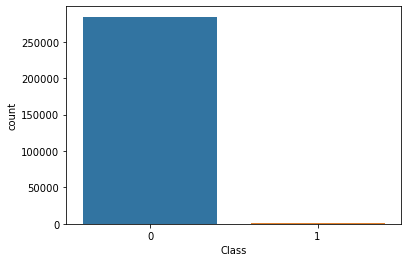

In [6]:
print("Quantidade de transações não fraudulentas: ", df['Class'].value_counts()[0])
print("Quantidade de transações fraudulentas: ", df['Class'].value_counts()[1])
sns.countplot(df['Class'])
plt.show()

Podemos observar que a classe que indica se ocorreu fraude esta muito desbalanceada, mais de 99% dos casos não ocorreram fraudes bancárias e isto pode ser um problema quando executarmos os algoritmos de classificação.

Criamos esta função para dividirmos os nossos dados de teste e treinamento. A escolhemos o Stratified Shuffle Split pois ele divide os dados e preserva o percentual de amostras de cada classe.

In [7]:
def executar_validador(X, y):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
    for train_id, test_id in sss.split(X, y):
        X_train, X_test = X[train_id], X[test_id]
        y_train, y_test = y[train_id], y[test_id]
        return X_train, X_test, y_train, y_test

Função para executar o algoritmo de classificação escolhido.

In [8]:
def executar_classificador(classificador, X_train, y_train, X_test):
    classificador.fit(X_train, y_train)
    y_pred = classificador.predict(X_test)
    return y_pred

Função para criar uma imagem da arvore após executado o algoritmo de classificação escolhido.

In [9]:
def criar_imagem_arvore(classificador, nome):
    plt.figure(figsize=(200,100))
    tree.plot_tree(classificador, filled=True, fontsize=14)
    plt.savefig(nome)
    plt.close()

Método para executar as funções de avaliação do modelo de arvore de decisão

In [10]:
def executar_metricas(y_test, y_pred):
    print("Resultado da Classificação utilizando a métrica da Acurácia: ", accuracy_score(y_test, y_pred)*100)
    print("Resultado da Classificação utilizando a métrica de Precisão: ", precision_score(y_test, y_pred)*100)
    print("Resultado da Classificação utilizando a métrica de Recall: ", recall_score(y_test, y_pred)*100)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = "d").set(xlabel = "Predição", ylabel = "Real", 
                                                                             title = "Matriz de Confusão")

Criando um DataFrame (X) com os atributos e uma Serie(y) com os rótulos.

Separando as amostras em dados de treino e teste.

In [11]:
X = df.drop(columns="Class").values
y = df['Class'].values

X_train, X_test, y_train, y_test = executar_validador(X, y)

## Decision Tree Classifier

In [22]:
%%time

classificador = DecisionTreeClassifier()
y_pred_arvore_decisao = executar_classificador(classificador, X_train, y_train, X_test)

Wall time: 17.6 s


In [34]:
classificador.get_depth()

21

In [81]:
criar_imagem_arvore(classificador, 'arvore_decisao1.png')

0.9990871107053826
0.7346938775510204
0.7346938775510204


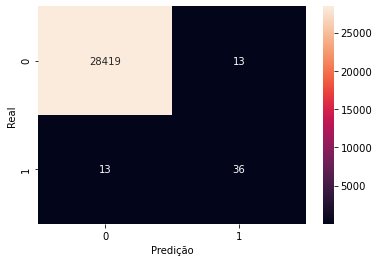

In [82]:
executar_metricas(y_test, y_pred_arvore_decisao)

Acurácia: Porcentagem de avaliações corretas

Precisão: É a porcentagem de predições positivas que estavam corretas.

Recall: É a porcentagem de valores positivos classificados corretamente

Tivemos um alto valor de acurácia, porem como estamos tratando de detecção de fraude (algo muito raro e nossa classe esta muito desbalanceada), teremos uma acurácia muito elevada ao sempre prever que não haveria uma fraude. Esse modelo de avaliação não seria muito útil. Utilizamos outras métricas de avaliação para termos resultados mais realistas.

In [103]:
%%time

classificador = DecisionTreeClassifier(max_depth=10, random_state=0)
y_pred_arvore_decisao = executar_classificador(classificador, X_train, y_train, X_test)

Wall time: 10.7 s


0.9994733330992591
0.9473684210526315
0.7346938775510204


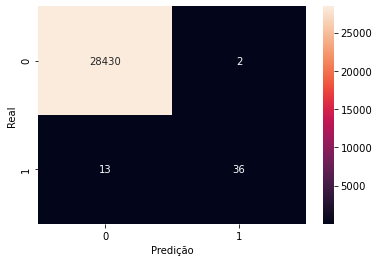

In [84]:
executar_metricas(y_test, y_pred_arvore_decisao)

In [85]:
classificador = DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_leaf=10)
y_pred_arvore_decisao = executar_classificador(classificador, X_train, y_train, X_test)

Resultado da Classificação utilizando a métrica da Acurácia:  99.9367999719111
Resultado da Classificação utilizando a métrica de Precisão:  86.04651162790698
Resultado da Classificação utilizando a métrica de Recall:  75.51020408163265


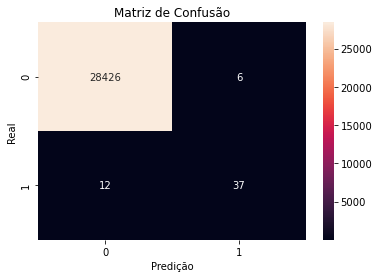

In [99]:
executar_metricas(y_test, y_pred_arvore_decisao)

In [100]:
classificador = DecisionTreeClassifier(max_depth=5, random_state=0)
y_pred_arvore_decisao = executar_classificador(classificador, X_train, y_train, X_test)

Resultado da Classificação utilizando a métrica da Acurácia:  99.9403110845827
Resultado da Classificação utilizando a métrica de Precisão:  92.10526315789474
Resultado da Classificação utilizando a métrica de Recall:  71.42857142857143


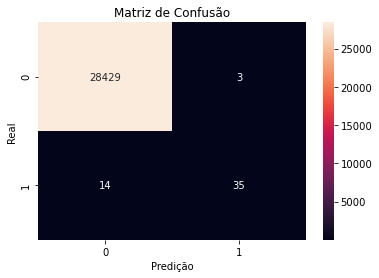

In [101]:
executar_metricas(y_test, y_pred_arvore_decisao)

## Random Forest Classifier

In [111]:
%%time
classificador_random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
y_pred_random_forest = executar_classificador(classificador_random_forest, X_train, y_train, X_test)

Wall time: 3min 50s


In [112]:
criar_imagem_arvore(classificador_random_forest.estimators_[0], "random_forest1")
criar_imagem_arvore(classificador_random_forest.estimators_[1], "random_forest2")

Resultado da Classificação utilizando a métrica da Acurácia:  99.95084442259751
Resultado da Classificação utilizando a métrica de Precisão:  94.87179487179486
Resultado da Classificação utilizando a métrica de Recall:  75.51020408163265


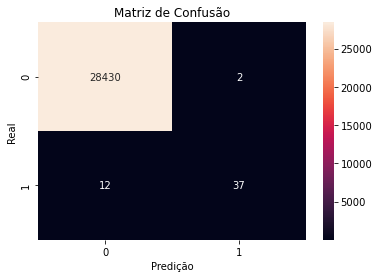

In [113]:
executar_metricas(y_test, y_pred_random_forest)

In [116]:
%%time

classificador_random_forest = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=10)
y_pred_random_forest = executar_classificador(classificador_random_forest, X_train, y_train, X_test)

Wall time: 1min 1s


Resultado da Classificação utilizando a métrica da Acurácia:  99.95435553526913
Resultado da Classificação utilizando a métrica de Precisão:  97.36842105263158
Resultado da Classificação utilizando a métrica de Recall:  75.51020408163265


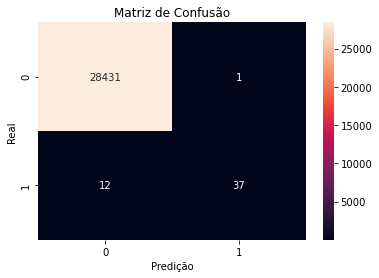

In [117]:
executar_metricas(y_test, y_pred_random_forest)

## AdaBoost Classifier

In [119]:
%%time
classificador_adaBoost = AdaBoostClassifier(random_state=0, n_estimators=50)
y_pred_adaBoost = executar_classificador(classificador_adaBoost, X_train, y_train, X_test)

Wall time: 2min 31s


In [123]:
criar_imagem_arvore(classificador_adaBoost.estimators_[0], "adaBoost1")
criar_imagem_arvore(classificador_adaBoost.estimators_[1], "adaBoost2")

Resultado da Classificação utilizando a métrica da Acurácia:  99.92626663389628
Resultado da Classificação utilizando a métrica de Precisão:  88.88888888888889
Resultado da Classificação utilizando a métrica de Recall:  65.3061224489796


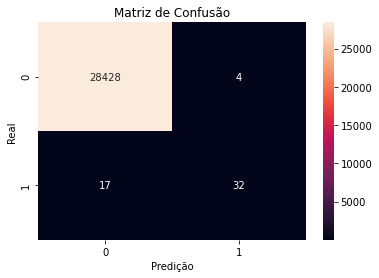

In [124]:
executar_metricas(y_test, y_pred_adaBoost)

In [128]:
%%time
classificador_adaBoost = AdaBoostClassifier(random_state=0, n_estimators=100)
y_pred_adaBoost = executar_classificador(classificador_adaBoost, X_train, y_train, X_test)

Wall time: 5min 3s


Resultado da Classificação utilizando a métrica da Acurácia:  99.9403110845827
Resultado da Classificação utilizando a métrica de Precisão:  86.36363636363636
Resultado da Classificação utilizando a métrica de Recall:  77.55102040816327


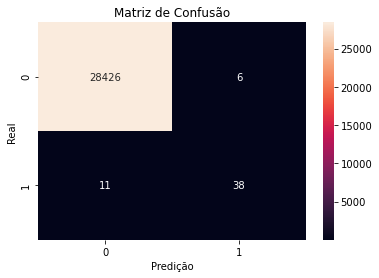

In [129]:
executar_metricas(y_test, y_pred_adaBoost)

In [130]:
%%time
classificador_adaBoost = AdaBoostClassifier(random_state=0, n_estimators=200)
y_pred_adaBoost = executar_classificador(classificador_adaBoost, X_train, y_train, X_test)

Wall time: 9min 47s


Resultado da Classificação utilizando a métrica da Acurácia:  99.95435553526913
Resultado da Classificação utilizando a métrica de Precisão:  92.85714285714286
Resultado da Classificação utilizando a métrica de Recall:  79.59183673469387


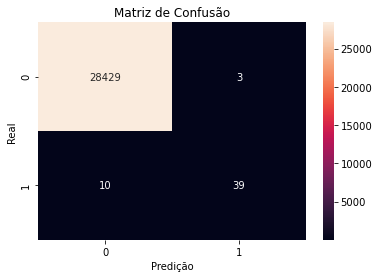

In [131]:
executar_metricas(y_test, y_pred_adaBoost)